---
# Perceptron
---

# I. inpute libary and Prepare the Data

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

sns.set_theme()



In [50]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/0. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [51]:
# X = df.drop('diagnosis', axis = 1).values
X = df[["radius_mean", "texture_mean"]].values
y = df['diagnosis']
y = np.where(y == "B", -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# II. Building the Perceptron Model

In [52]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [53]:
# Instantiate one instance of the Perceptron class
perceptron_model = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
perceptron_model.train(X_train, y_train)

In [54]:
# Predict labels on the features in X_test
y_hat = perceptron_model.predict(X_test)

# Compare y_hat and y
print(y_test == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True False False  True False False
  True False  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True False  True  True
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True False  True False  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [55]:
classification_error = (np.rint(perceptron_model.predict(X_test)) != y_test).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y_test)}")

Classification Error = 0.12280701754385964


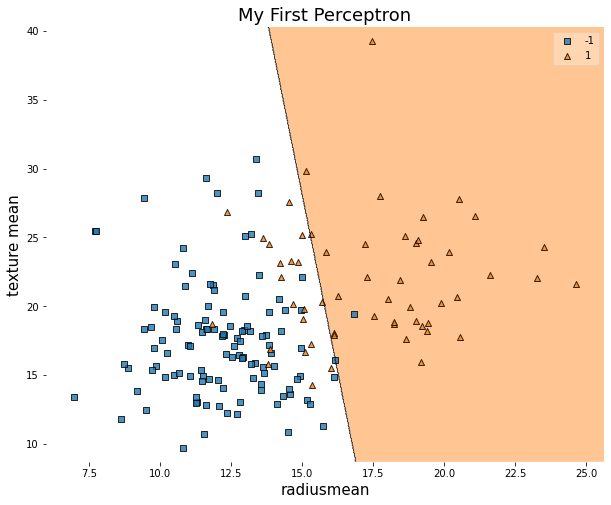

In [56]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = perceptron_model)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("radiusmean", fontsize = 15)
plt.ylabel("texture mean", fontsize = 15)
plt.show()

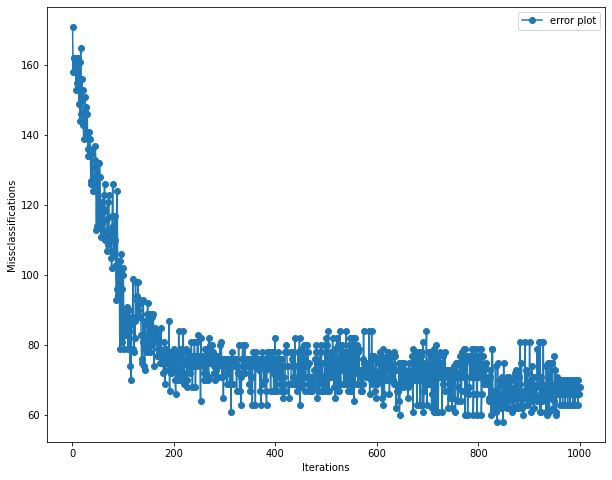

In [57]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(perceptron_model.errors_)+1), perceptron_model.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

---
## Perceptron - Scikit Learn

In [58]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Perceptron_model = Perceptron()
Perceptron_model.fit(X_train, y_train)
predictions = perceptron_model.predict(X_test)

Perceptron_model.score(X_test, y_test)

0.7660818713450293

[[113   1]
 [ 20  37]]


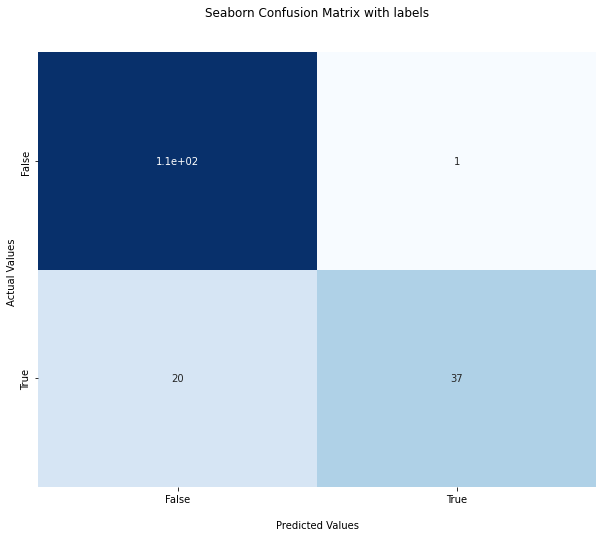

In [59]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.85      0.99      0.91       114
           1       0.97      0.65      0.78        57

    accuracy                           0.88       171
   macro avg       0.91      0.82      0.85       171
weighted avg       0.89      0.88      0.87       171



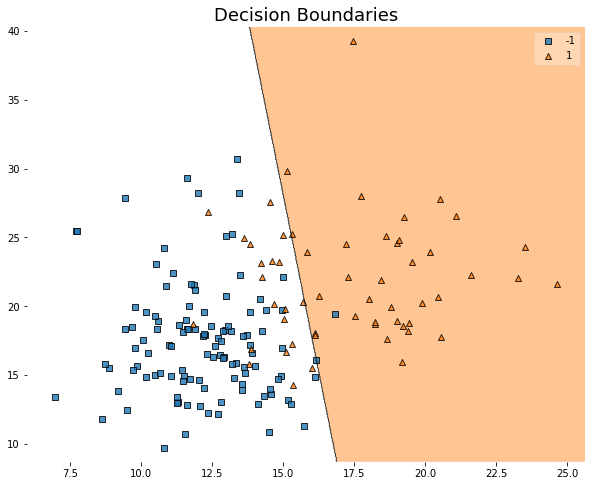

In [62]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X_test, y_test, clf = perceptron_model)
plt.xlabel("", fontsize = 15)
plt.ylabel("", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()